In [21]:
cog_key = 'd1ee863010c04ec898f379a28b22bd91'
cog_endpoint = 'https://diwakarmultiai.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://diwakarmultiai.cognitiveservices.azure.com/ using key d1ee863010c04ec898f379a28b22bd91


In [22]:
! pip install azure-cognitiveservices-vision-computervision 


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Extracted Text:
Box 252523,
Lusaka
ZAMBIA.
2nd October, 2009
The Manager,
Kundananji Corporation,
Private bag 24,
Lusaka,
ZAMBIA
Dear Mr. Kundananji,
I thoroughly enjoyed the meeting we had on the 28th of October about the position of
Graphics Designer at Kundananji Corporation. I was impressed with the industriousness I
perfectly.
observed in the workers, and with my industrious nature, I am confident that I will fit in
I neglected to mention during the interview that in the recent past, I have been hired by several
high profile companies to design graphics for their websites. They were highly impressed with
what I did and still refer to me whenever they want to make a change to their products.
In addition. I worked for six months with Book House Publishers, where I helped gesian
brilliant covers for a large number of clients. I gained a higher appreciation for pattern and
colour, and especially how colours interact to convey messages. Such added understanding
and appreciation will ce

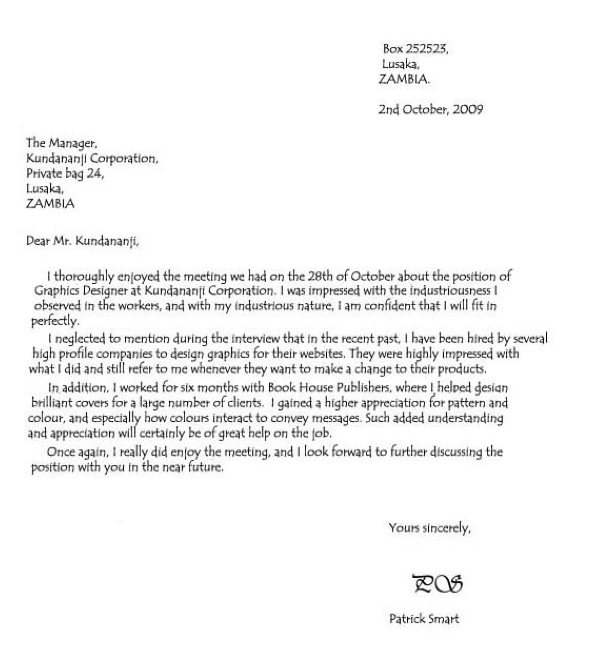

In [24]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials
import matplotlib.pyplot as plt
from PIL import Image
import pyttsx3
import time
import os
%matplotlib inline

# Read the image file
image_path = os.path.join('Formal_Letter.jpg')
image_stream = open(image_path, "rb")

# Get a client for the computer vision service
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Submit a request to read printed text in the image and get the operation ID
read_operation = computervision_client.read_in_stream(image_stream,
                                                      raw=True)
operation_location = read_operation.headers["Operation-Location"]
operation_id = operation_location.split("/")[-1]

# Wait for the asynchronous operation to complete
while True:
    read_results = computervision_client.get_read_result(operation_id)
    if read_results.status not in [OperationStatusCodes.running]:
        break
    time.sleep(1)

# If the operation was successfuly, process the text line by line
if read_results.status == OperationStatusCodes.succeeded:
    extracted_text = ""
    for result in read_results.analyze_result.read_results:
        for line in result.lines:
            extracted_text += line.text + "\n"
            
    # Output the extracted text
    print("Extracted Text:")
    print(extracted_text)

    # Initialize pyttsx3 TTS engine
    engine = pyttsx3.init()
    
    # Set properties for the TTS engine
    engine.setProperty('rate', 150)  # Speed of speech
    engine.setProperty('volume', 1.0)  # Volume (0.0 to 1.0)

    # Speak the extracted text
    engine.say(extracted_text)
    engine.runAndWait()
    
# Open image and display it.
print('\n')
fig = plt.figure(figsize=(12,12))
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)